<a href="https://colab.research.google.com/github/Kwazi083/MBTI/blob/master/Final_Kwazi_personality_profile_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
#read train and test data
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Personality Profile Prediction/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Personality Profile Prediction/test.csv')

In [0]:
#train first few records
train_df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [0]:
#test first few records
test_df.head()

,id,posts
0,1,Musical Linguistic Logic & Naturalist (tied)|...
1,2,'You: hello :) Stranger: hii You: how are you ...
2,3,'What worked for me was knowing that limerence...
3,4,'Please forget about him. You should definitel...
4,5,"'Ooh, ENTJ Celestia is actually an interesting..."


In [0]:
#get IDs from test dataset
pred_id = test_df['id']

In [0]:
#IDs shape
pred_id.shape

(2169,)

In [0]:
#Test shape
test_df.shape

(2169, 2)

In [0]:
#Train shape
train_df.shape

(6506, 2)

In [0]:
#Number of unique items in the 'type' column
train_df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [0]:
#Train dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 2 columns):
type     6506 non-null object
posts    6506 non-null object
dtypes: object(2)
memory usage: 101.7+ KB


In [0]:
#Test dataset information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 2 columns):
id       2169 non-null int64
posts    2169 non-null object
dtypes: int64(1), object(1)
memory usage: 34.0+ KB


In [0]:
#First five posts
print(train_df.iloc[:5, :2])

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [0]:
#View full text of the first post
print(train_df.iloc[0,1])

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

From the above post, it looks like each post is separated by <b>"|||"</b> and the website links appears more frequently, also the personality type codes are referenced frequently. These codes should be added to stopwords to avoid biasing the model.

In [0]:
#Count each "type" appearance
train_df['type'].value_counts()

INFP    1386
INFJ    1100
INTP     960
INTJ     830
ENTP     530
ENFP     496
ISTP     255
ISFP     198
ENTJ     167
ISTJ     145
ENFJ     143
ISFJ     124
ESTP      71
ESFP      36
ESFJ      35
ESTJ      30
Name: type, dtype: int64

The 'type' column contains 16 unique codes, representing the 16 different personality types

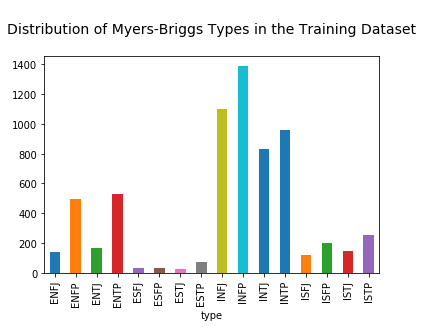

In [0]:
#plot number of 'posts' per 'type'
train_df.groupby('type').posts.count().plot.bar(ylim=0)
plt.title("\nDistribution of Myers-Briggs Types in the Training Dataset\n", fontsize=14)
plt.show()

Train dataset of the 6506 records, <b>INFP</b> is the most frequently-appearing Myers-Briggs type in this dataset with 1386 records, while <b>ESTJ</b> is the least frequent with 30 records

In [0]:
num_posts = train_df['posts'].size
num_posts

6506

In [0]:
train_df['cleaned_posts'] = train_df['posts'].copy()
train_df.head()

,type,posts,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...


In [0]:
#Concatenate two columns[posts] from both train and test dataset
all_posts_df = pd.concat([train_df['posts'],test_df['posts']], axis = 0, sort = False)

In [0]:
all_posts_df.tail()

2164    'https://www.youtube.com/watch?v=t8edHB_h908||...
2165    'So...if this thread already exists someplace ...
2166    'So many questions when i do these things.  I ...
2167    'I am very conflicted right now when it comes ...
2168    'It has been too long since I have been on per...
Name: posts, dtype: object

In [0]:
all_df = pd.DataFrame({'posts':all_posts_df})

In [0]:
all_df.tail()

,posts
2164,'https://www.youtube.com/watch?v=t8edHB_h908||...
2165,'So...if this thread already exists someplace ...
2166,'So many questions when i do these things. I ...
2167,'I am very conflicted right now when it comes ...
2168,'It has been too long since I have been on per...


In [0]:
all_df['cleaned_posts'] = all_df['posts'].copy()

In [0]:
all_df['type'] = train_df['type']

In [0]:
all_df.head()

,posts,cleaned_posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,'Good one _____ https://www.youtube.com/wat...,INTP
3,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...",INTJ
4,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,ENTJ


In [0]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [0]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [0]:
#Create list of punctuation marks
punctuations = string.punctuation

In [0]:
#Create list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [0]:
#Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [0]:
#Data Cleaning and preprocessing
#Replace ||| with empty space
all_df['cleaned_posts'] = all_df['cleaned_posts'].apply(lambda x: x.replace('|||', ' '))

In [0]:
#Replace hyperlinks with 'url'
all_df['cleaned_posts'] = all_df['cleaned_posts'].apply(lambda x: re.sub(r'\bhttps?:\/\/.*?[\r\n]*? ', 'url ', x, flags=re.MULTILINE))

In [0]:
#remove all punctuation marks and digits
all_df['cleaned_posts'] = all_df['cleaned_posts'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
all_df['cleaned_posts'] = all_df['cleaned_posts'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))

In [0]:
#Add personality type codes from 'posts' to stopwords list
nlp.Defaults.stop_words |= {'infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', \
                    'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj'}
stop_words = nlp.Defaults.stop_words

In [0]:
#Check if the personality type code is the stopword
nlp.vocab['infj'].is_stop

True

In [0]:
#Creating the tokenizer function
def spacy_tokenizer(posts):
    
    #Creating token object, which is used to create documents with linguistic annotations.
    my_tokens = parser(posts)

    #Lemmatizing each token and converting each token into lowercase
    my_tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in my_tokens ]

    #Removing stop words
    my_tokens = [ word for word in my_tokens if word not in stop_words and word not in punctuations ]

    #Return preprocessed list of tokens
    return my_tokens

In [0]:
#View original text to confirm if the clean_posts function is working properly
#train_df.cleaned_posts.iloc[0]

In [0]:
#View cleaned post
#spacy_tokenizer(train_df.cleaned_posts.iloc[0])

In [0]:
all_df.head()

,posts,cleaned_posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,url url enfp and intj moments url sportscent...,INFJ
1,'I'm finding the lack of me in these posts ver...,Im finding the lack of me in these posts very ...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,Good one url Of course to which I say I kn...,INTP
3,"'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...,INTJ
4,'You're fired.|||That's another silly misconce...,Youre fired Thats another silly misconception ...,ENTJ


In [0]:
#Create a binary column for each of the 4 axis types
all_df['I-E'] = all_df['type'].map(lambda x: 0 if x[0] == 'I' else 1)
all_df['N-S'] = all_df['type'].map(lambda x: 1 if x[1] == 'N' else 0)
all_df['T-F'] = all_df['type'].map(lambda x: 1 if x[2] == 'T' else 0)
all_df['J-P'] = all_df['type'].map(lambda x: 1 if x[3] == 'J' else 0)

In [0]:
all_df.head()

,posts,cleaned_posts,type,I-E,N-S,T-F,J-P
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,url url enfp and intj moments url sportscent...,INFJ,0,1,0,1
1,'I'm finding the lack of me in these posts ver...,Im finding the lack of me in these posts very ...,ENTP,1,1,1,0
2,'Good one _____ https://www.youtube.com/wat...,Good one url Of course to which I say I kn...,INTP,0,1,1,0
3,"'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...,INTJ,0,1,1,1
4,'You're fired.|||That's another silly misconce...,Youre fired Thats another silly misconception ...,ENTJ,1,1,1,1


In [0]:
#Will add count plot for each code later - Kwazi

In [0]:
#Calculate baseline for each of the four axes
baseline_IE = all_df['I-E'].value_counts().max() / all_df['I-E'].value_counts().sum()
baseline_NS = all_df['N-S'].value_counts().max() / all_df['N-S'].value_counts().sum()
baseline_TF = all_df['T-F'].value_counts().max() / all_df['T-F'].value_counts().sum()
baseline_JP = all_df['J-P'].value_counts().max() / all_df['J-P'].value_counts().sum()

print('Introversion - Extroversion: ', baseline_IE)
print('Intuition - Sensing: ', baseline_NS)
print('Thinking - Feeling: ', baseline_TF)
print('Judging - Perceiving: ', baseline_JP)

Introversion - Extroversion:  0.7697982708933717
Intuition - Sensing:  0.8623631123919309
Thinking - Feeling:  0.5397118155619597
Judging - Perceiving:  0.6059942363112392


In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE

In [0]:
#Count Vectorizer
#bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))

In [0]:
#TF-IDF (Term Frequency-Inverse Document Frequency) for our terms.
#tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [0]:
cv = CountVectorizer(tokenizer=spacy_tokenizer,preprocessor=None,stop_words=None, ngram_range=(1,2), max_features=1000)
cv.fit(all_df['cleaned_posts'])
cv.transform(all_df['cleaned_posts'])

cv.transform(all_df['cleaned_posts']).todense()
all_df_posts = pd.DataFrame(cv.transform(all_df['cleaned_posts']).todense(), 
             columns=cv.get_feature_names())
all_df_posts.head()

,2,ability,able,absolutely,accept,accord,account,accurate,act,act like,...,year ago,year old,yep,yes,yes think,yesterday,young,youtube,﻿1,﻿1 time
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2,0,2,1,2,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,2,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0


In [0]:
all_df_posts.shape

(8675, 1000)

In [0]:
#Examine the top 10 occuring words in this round of CountVectorizer
print(all_df_posts.sum().sort_values(ascending=False).head(10))

like      72588
think     68705
people    47815
know      43351
good      43194
s         39385
feel      35810
thing     34308
time      33187
url       28061
dtype: int64


In [0]:
#View the tokens created
with pd.option_context('display.max_rows', 1, 'display.max_columns', None):
    print(all_df_posts)

    2  ability  able  absolutely  accept  accord  account  accurate  act  \
0   0        0     0           0       0       0        0         0    0   
.. ..      ...   ...         ...     ...     ...      ...       ...  ...   

    act like  action  activity  actual  actually  add  admit  advice  affect  \
0          0       0         0       0         0    0      0       0       0   
..       ...     ...       ...     ...       ...  ...    ...     ...     ...   

    afraid  age  ago  agree  ah  allow  alot  alright  amaze  analyze  anger  \
0        0    1    1      0   0      0     0        0      0        0      0   
..     ...  ...  ...    ...  ..    ...   ...      ...    ...      ...    ...   

    angry  animal  anime  annoy  answer  answer question  anxiety  anymore  \
0       0       0      0      0       0                0        0        0   
..    ...     ...    ...    ...     ...              ...      ...      ...   

    anyways  apparently  appear  apply  appreciate  ap

[8675 rows x 1000 columns]


In [0]:
#Determine baseline
baseline = train_df['type'].value_counts().max() / train_df['type'].value_counts().sum()
baseline

0.21303412234860128

In [0]:
#My Features per personality type
#Introversion - Extroversion
X_intro_extro = all_df['cleaned_posts'].values
y_intro_extro = all_df['I-E'].values

#Intuition - Sensing
X_intu_sens = all_df['cleaned_posts'].values
y_intu_sens = all_df['N-S'].values

#Thinking - Feeling
X_think_feel = all_df['cleaned_posts'].values
y_think_feel = all_df['T-F'].values

#Judging - Perceiving
X_jud_perc = all_df['cleaned_posts'].values
y_jud_perc = all_df['J-P'].values

In [0]:
# Train-test splits, using type variables as target and posts variable as predictor
# Introversion - Extroversion
X_train_IE, X_test_IE, y_train_IE, y_test_IE = train_test_split(X_intro_extro,
                                                   y_intro_extro,
                                                   test_size=0.25, random_state=42)

In [0]:
print('X_train: ', X_train_IE.shape)
print('X_test: ', X_test_IE.shape)
print('y_train: ', y_train_IE.shape)
print('y_test: ', y_test_IE.shape)

X_train:  (6506,)
X_test:  (2169,)
y_train:  (6506,)
y_test:  (2169,)


In [0]:
#Run CountVectorizer on the X train/test 'cleaned_posts' column using the arguments identified earlier
cv = CountVectorizer(tokenizer = spacy_tokenizer,preprocessor=None, stop_words=None, ngram_range=(1,2), max_features=1000)
cv.fit(X_train_IE)
X_train_cv = cv.transform(X_train_IE)

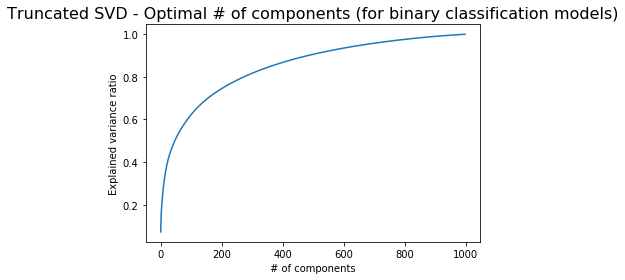

In [0]:
#Use max components and graph the explained variance ratio to find cutoff point 
t_svd = TruncatedSVD(n_components=999)
t_svd.fit(X_train_cv)
plt.plot(range(999), t_svd.explained_variance_ratio_.cumsum())
plt.title("Truncated SVD - Optimal # of components (for binary classification models)", fontsize=16)
plt.xlabel("# of components")
plt.ylabel("Explained variance ratio");

The graph above suggests that approximately 100 components would be most effective for the binary classification models, since that is where the explained variance begins to flatten out.

#### Preprocessing Pipeline for the binary classifications

In [0]:
#Pipeline for the data preprocessing steps (CountVectorizer, TruncatedSVD) on the X data
from sklearn.pipeline import make_pipeline
pipeline_preprocessing = make_pipeline(
    CountVectorizer(tokenizer = spacy_tokenizer,preprocessor=None, stop_words=None, ngram_range=(1,2), max_features=1000),
    TruncatedSVD(n_components=100))

X_train_IE_p = pipeline_preprocessing.fit_transform(X_train_IE)
X_test_IE_p = pipeline_preprocessing.transform(X_test_IE)

In [0]:
#Use SMOTE (Synthetic Minority Over-sampling Technique) to even out the unbalanced test sample
#sm = SMOTE()
#Xsm_train_IE_p, ysm_train_IE = sm.fit_sample(X_train_IE_p, y_train_IE)

In [0]:
log_reg = LogisticRegression()
#log_reg.fit(X_train_IE_p,y_train_IE)
log_reg.fit(X_train_IE_p,y_train_IE)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print("TRAINING SET")
print("Accuracy: ", log_reg.score(X_train_IE_p, y_train_IE))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_IE, log_reg.predict(X_train_IE_p)))
print("Classification Report:")
print(classification_report(y_train_IE, log_reg.predict(X_train_IE_p)))

TRAINING SET
Accuracy:  0.7745158315401168
Confusion Matrix (counts):
[[4854  127]
 [1340  185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      4981
           1       0.59      0.12      0.20      1525

   micro avg       0.77      0.77      0.77      6506
   macro avg       0.69      0.55      0.54      6506
weighted avg       0.74      0.77      0.71      6506



In [0]:
ie_pred = log_reg.predict(X_test_IE_p)

In [0]:
print("TEST SET")
print("Accuracy: ", log_reg.score(X_test_IE_p, y_test_IE))
print("Confusion Matrix:")
print(confusion_matrix(y_test_IE, log_reg.predict(X_test_IE_p)))
print("Classification Report:")
print(classification_report(y_test_IE, log_reg.predict(X_test_IE_p)))

TEST SET
Accuracy:  0.7879207007837713
Confusion Matrix:
[[1658   39]
 [ 421   51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1697
           1       0.57      0.11      0.18       472

   micro avg       0.79      0.79      0.79      2169
   macro avg       0.68      0.54      0.53      2169
weighted avg       0.75      0.79      0.73      2169



In [0]:
# Intuition - Sensing
X_train_NS, X_test_NS, y_train_NS, y_test_NS = train_test_split(X_intu_sens,
                                                   y_intu_sens,
                                                   test_size=0.25, random_state=42)
# Thinking - Feeling
X_train_TF, X_test_TF, y_train_TF, y_test_TF = train_test_split(X_think_feel,
                                                   y_think_feel,
                                                   test_size=0.25, random_state=42)
# Judging - Perceiving
X_train_JP, X_test_JP, y_train_JP, y_test_JP = train_test_split(X_jud_perc,
                                                   y_jud_perc,
                                                   test_size=0.25, random_state=42)

In [0]:
#Pipeline for other three groups
pipeline_preprocessing2 = make_pipeline(
    CountVectorizer(tokenizer = spacy_tokenizer,preprocessor=None, stop_words=None, ngram_range=(1,2), max_features=1000),
    TruncatedSVD(n_components=100))

In [0]:
#Intuition - Sensing Pipeline
X_train_NS_p = pipeline_preprocessing2.fit_transform(X_train_NS)
X_test_NS_p = pipeline_preprocessing2.transform(X_test_NS)

In [0]:
#Thinking - Feeling Pipeline
X_train_TF_p = pipeline_preprocessing2.fit_transform(X_train_TF)
X_test_TF_p = pipeline_preprocessing2.transform(X_test_TF)

In [0]:
#Judging - Perceiving Pipeline
X_train_JP_p = pipeline_preprocessing2.fit_transform(X_train_JP)
X_test_JP_p = pipeline_preprocessing2.transform(X_test_JP)

In [0]:
#Use SMOTE (Synthetic Minority Over-sampling Technique) to even out the unbalanced test sample
#sm = SMOTE()
#Xsm_train_NS_p, ysm_train_NS = sm.fit_sample(X_train_NS_p, y_train_NS)

In [0]:
#Intuition - Sensing Model Training
log_reg2 = LogisticRegression()
train_fit = log_reg2.fit(X_train_NS_p,y_train_NS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Intuition - Sensing Model Testing
ns_pred = log_reg2.predict(X_test_NS_p)

In [0]:
print("TRAINING SET")
print("Accuracy: ", log_reg2.score(X_train_NS_p, y_train_NS))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_NS, log_reg2.predict(X_train_NS_p)))
print("Classification Report:")
print(classification_report(y_train_NS, log_reg2.predict(X_train_NS_p)))

TRAINING SET
Accuracy:  0.8627420842299416
Confusion Matrix (counts):
[[  17  885]
 [   8 5596]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.02      0.04       902
           1       0.86      1.00      0.93      5604

   micro avg       0.86      0.86      0.86      6506
   macro avg       0.77      0.51      0.48      6506
weighted avg       0.84      0.86      0.80      6506



In [0]:
print("TEST SET")
print("Accuracy: ", log_reg2.score(X_test_NS_p, y_test_NS))
print("Confusion Matrix:")
print(confusion_matrix(y_test_NS, log_reg2.predict(X_test_NS_p)))
print("Classification Report:")
print(classification_report(y_test_NS, log_reg2.predict(X_test_NS_p)))

TEST SET
Accuracy:  0.8658367911479945
Confusion Matrix:
[[   4  288]
 [   3 1874]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.01      0.03       292
           1       0.87      1.00      0.93      1877

   micro avg       0.87      0.87      0.87      2169
   macro avg       0.72      0.51      0.48      2169
weighted avg       0.83      0.87      0.81      2169



In [0]:
#Thinking - Feeling Model Training
log_reg3 = LogisticRegression()
train_fit3 = log_reg3.fit(X_train_TF_p,y_train_TF)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Thinking - Feeling Model Testing
tf_pred = log_reg3.predict(X_test_TF_p)

In [0]:
print("TRAINING SET")
print("Accuracy: ", log_reg3.score(X_train_TF_p, y_train_TF))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_TF, log_reg3.predict(X_train_TF_p)))
print("Classification Report:")
print(classification_report(y_train_TF, log_reg3.predict(X_train_TF_p)))

TRAINING SET
Accuracy:  0.7299415923762681
Confusion Matrix (counts):
[[2642  847]
 [ 910 2107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3489
           1       0.71      0.70      0.71      3017

   micro avg       0.73      0.73      0.73      6506
   macro avg       0.73      0.73      0.73      6506
weighted avg       0.73      0.73      0.73      6506



In [0]:
print("TEST SET")
print("Accuracy: ", log_reg3.score(X_test_TF_p, y_test_TF))
print("Confusion Matrix:")
print(confusion_matrix(y_test_TF, log_reg3.predict(X_test_TF_p)))
print("Classification Report:")
print(classification_report(y_test_TF, log_reg3.predict(X_test_TF_p)))

TEST SET
Accuracy:  0.7044721069617336
Confusion Matrix:
[[875 318]
 [323 653]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1193
           1       0.67      0.67      0.67       976

   micro avg       0.70      0.70      0.70      2169
   macro avg       0.70      0.70      0.70      2169
weighted avg       0.70      0.70      0.70      2169



In [0]:
#Use SMOTE (Synthetic Minority Over-sampling Technique) to even out the unbalanced test sample
#sm = SMOTE()
#Xsm_train_JP_p, ysm_train_JP = sm.fit_sample(X_train_JP_p, y_train_JP)

In [0]:
#Judging - Perceiving Model Training
log_reg4 = LogisticRegression()
train_fit4 = log_reg4.fit(X_train_JP_p,y_train_JP)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Judging - Perceiving Model Testing
jp_pred = log_reg4.predict(X_test_JP_p)

In [0]:
print("TRAINING SET")
print("Accuracy: ", log_reg4.score(X_train_JP_p, y_train_JP))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_JP, log_reg4.predict(X_train_JP_p)))
print("Classification Report:")
print(classification_report(y_train_JP, log_reg4.predict(X_train_JP_p)))

TRAINING SET
Accuracy:  0.6715339686443283
Confusion Matrix (counts):
[[3382  556]
 [1581  987]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      3938
           1       0.64      0.38      0.48      2568

   micro avg       0.67      0.67      0.67      6506
   macro avg       0.66      0.62      0.62      6506
weighted avg       0.66      0.67      0.65      6506



In [0]:
print("TEST SET")
print("Accuracy: ", log_reg4.score(X_test_JP_p, y_test_JP))
print("Confusion Matrix:")
print(confusion_matrix(y_test_JP, log_reg4.predict(X_test_JP_p)))
print("Classification Report:")
print(classification_report(y_test_JP, log_reg4.predict(X_test_JP_p)))

TEST SET
Accuracy:  0.661134163208852
Confusion Matrix:
[[1134  185]
 [ 550  300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.76      1319
           1       0.62      0.35      0.45       850

   micro avg       0.66      0.66      0.66      2169
   macro avg       0.65      0.61      0.60      2169
weighted avg       0.65      0.66      0.64      2169



In [0]:
from sklearn.metrics import log_loss

score = log_loss(y_test_IE, ie_pred)
print(score)

7.324973870889208


In [0]:
#Fit and score a Random Forest Classifier on SMOTEd data using the parameters identified by the grid search
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_leaf=1, min_samples_split=6, n_estimators=76, 
                             criterion='gini', bootstrap='False', n_jobs= -1, random_state=123)
rfc.fit(X_train_IE_p, y_train_IE)
print("TRAINING SET")
print("Accuracy: ", rfc.score(X_train_IE_p, y_train_IE))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_IE, rfc.predict(X_train_IE_p)))
print("Classification Report:")
print(classification_report(y_train_IE, rfc.predict(X_train_IE_p)))
print("")

ie_test = rfc.predict(X_test_IE_p)

print("TEST SET")
print("Accuracy: ", rfc.score(X_test_IE_p, y_test_IE))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_test_IE, rfc.predict(X_test_IE_p)))
print("Classification Report:")
print(classification_report(y_test_IE, rfc.predict(X_test_IE_p)))

TRAINING SET
Accuracy:  0.9996925914540424
Confusion Matrix (counts):
[[4981    0]
 [   2 1523]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4981
           1       1.00      1.00      1.00      1525

   micro avg       1.00      1.00      1.00      6506
   macro avg       1.00      1.00      1.00      6506
weighted avg       1.00      1.00      1.00      6506


TEST SET
Accuracy:  0.7823881973259567
Confusion Matrix (counts):
[[1694    3]
 [ 469    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1697
           1       0.50      0.01      0.01       472

   micro avg       0.78      0.78      0.78      2169
   macro avg       0.64      0.50      0.45      2169
weighted avg       0.72      0.78      0.69      2169



In [0]:
score = log_loss(y_test_IE, ie_test)
print(score)

7.516046499396097


In [0]:
rfc = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=25, 
                             criterion='gini', bootstrap='True', n_jobs= -1, random_state=123)
rfc.fit(X_train_NS_p, y_train_NS)
print("TRAINING SET")
print("Accuracy: ", rfc.score(X_train_NS_p, y_train_NS))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_NS, rfc.predict(X_train_NS_p)))
print("Classification Report:")
print(classification_report(y_train_NS, rfc.predict(X_train_NS_p)))
print("")

ns_test = rfc.predict(X_test_NS_p)

print("TEST SET")
print("Accuracy: ", rfc.score(X_test_NS_p, y_test_NS))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_test_NS, rfc.predict(X_test_NS_p)))
print("Classification Report:")
print(classification_report(y_test_NS, rfc.predict(X_test_NS_p)))

TRAINING SET
Accuracy:  0.9966185059944667
Confusion Matrix (counts):
[[ 880   22]
 [   0 5604]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       902
           1       1.00      1.00      1.00      5604

   micro avg       1.00      1.00      1.00      6506
   macro avg       1.00      0.99      0.99      6506
weighted avg       1.00      1.00      1.00      6506


TEST SET
Accuracy:  0.8621484555094514
Confusion Matrix (counts):
[[   1  291]
 [   8 1869]]
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.00      0.01       292
           1       0.87      1.00      0.93      1877

   micro avg       0.86      0.86      0.86      2169
   macro avg       0.49      0.50      0.47      2169
weighted avg       0.76      0.86      0.80      2169



In [0]:
rfc = RandomForestClassifier(min_samples_leaf=3, min_samples_split=2, n_estimators=86, 
                             criterion='entropy', bootstrap='False', n_jobs= -1, random_state=123)
rfc.fit(X_train_TF_p, y_train_TF)
print("TRAINING SET")
print("Accuracy: ", rfc.score(X_train_TF_p, y_train_TF))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_TF, rfc.predict(X_train_TF_p)))
print("Classification Report:")
print(classification_report(y_train_TF, rfc.predict(X_train_TF_p)))
print("")

tf_test = rfc.predict(X_test_TF_p)

print("TEST SET")
print("Accuracy: ", rfc.score(X_test_TF_p, y_test_TF))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_test_TF, rfc.predict(X_test_TF_p)))
print("Classification Report:")
print(classification_report(y_test_TF, rfc.predict(X_test_TF_p)))

TRAINING SET
Accuracy:  1.0
Confusion Matrix (counts):
[[3489    0]
 [   0 3017]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3489
           1       1.00      1.00      1.00      3017

   micro avg       1.00      1.00      1.00      6506
   macro avg       1.00      1.00      1.00      6506
weighted avg       1.00      1.00      1.00      6506


TEST SET
Accuracy:  0.6500691562932227
Confusion Matrix (counts):
[[906 287]
 [472 504]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.70      1193
           1       0.64      0.52      0.57       976

   micro avg       0.65      0.65      0.65      2169
   macro avg       0.65      0.64      0.64      2169
weighted avg       0.65      0.65      0.64      2169



In [0]:
rfc = RandomForestClassifier(min_samples_leaf=2, min_samples_split=2, n_estimators=85, 
                             criterion='entropy', bootstrap='False', n_jobs= -1, random_state=123)
rfc.fit(X_train_JP_p, y_train_JP)
print("TRAINING SET")
print("Accuracy: ", rfc.score(X_train_JP_p, y_train_JP))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_JP, rfc.predict(X_train_JP_p)))
print("Classification Report:")
print(classification_report(y_train_JP, rfc.predict(X_train_JP_p)))
print("")

jp_test = rfc.predict(X_test_JP_p)

print("TEST SET")
print("Accuracy: ", rfc.score(X_test_JP_p, y_test_JP))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_test_JP, rfc.predict(X_test_JP_p)))
print("Classification Report:")
print(classification_report(y_test_JP, rfc.predict(X_test_JP_p)))

TRAINING SET
Accuracy:  1.0
Confusion Matrix (counts):
[[3938    0]
 [   0 2568]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3938
           1       1.00      1.00      1.00      2568

   micro avg       1.00      1.00      1.00      6506
   macro avg       1.00      1.00      1.00      6506
weighted avg       1.00      1.00      1.00      6506


TEST SET
Accuracy:  0.6196403872752421
Confusion Matrix (counts):
[[1247   72]
 [ 753   97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.95      0.75      1319
           1       0.57      0.11      0.19       850

   micro avg       0.62      0.62      0.62      2169
   macro avg       0.60      0.53      0.47      2169
weighted avg       0.60      0.62      0.53      2169



In [0]:
#results = pd.DataFrame({'id':pred_id,'mind':ie_pred,'energy':ns_pred,'nature':tf_pred,'tactics':jp_pred})
results = pd.DataFrame({'id':pred_id,'mind':ie_test,'energy':ns_test,'nature':tf_test,'tactics':jp_test})

In [0]:
results.head()

,id,mind,energy,nature,tactics
0,1,0,1,1,0
1,2,0,1,1,0
2,3,0,1,1,0
3,4,0,0,0,0
4,5,0,1,0,0


In [0]:
results.to_csv('Kwazi_submition_Rfc.csv', index = False)